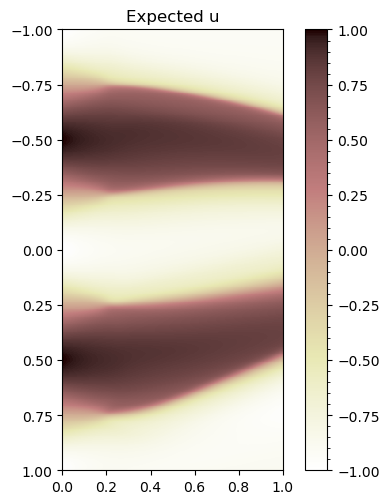

In [2]:
import torch
from torch import nn
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

from BM_WZ_CHnet import BM_WZ_CHnet
#from BM_WZ_CHnet import Initial_Condition_Loss, Initial_Condition_u

import os
from datetime import datetime
currentDateTime = datetime.now()
#print("Date of Today : ", currentDateTime.month, " /", currentDateTime.day, "\nHour : ", currentDateTime.hour) 

#Date of Today
ctime = f"{currentDateTime.month}_{currentDateTime.day}_{currentDateTime.hour}h"


###########################################

z_plotted = 0
time_plotted = 1

###########################################

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
layers=[2, 128, 128, 128, 128, 128, 128, 1]

net = BM_WZ_CHnet(layers) #.to(device)

net.load_state_dict(torch.load("ES_min_loss_lr0.001_t0.2_3_5_7h.pt")) #, map_location=torch.device('cpu')

#Graph at various time slices

spatial_discretization = 500


#Define numpy arrays for inputs
x1 = np.linspace(net.t0,time_plotted,spatial_discretization).reshape(spatial_discretization)
x2 = np.linspace(net.x1_l,net.x1_u,spatial_discretization).reshape(spatial_discretization)
x1x2 = np.array(np.meshgrid(x1, x2)).reshape(2,spatial_discretization**2)

#t1 = 0*np.ones((spatial_discretization**2,1))
#t2 = 0.04*np.ones((spatial_discretization**2,1))
#t3 = time_plotted*np.ones((spatial_discretization**2,1))

x1_input = x1x2[0].reshape(spatial_discretization**2, 1)
x2_input = x1x2[1].reshape(spatial_discretization**2, 1)

x1x2 = [x1_input, x2_input]

#convert to pytorch tensors
pt_x1 = Variable(torch.from_numpy(x1_input).float(), requires_grad=True) #.to(device)
pt_x2 = Variable(torch.from_numpy(x2_input).float(), requires_grad=True) #.to(device)

#pt_t1 = Variable(torch.from_numpy(t1).float(), requires_grad=True) #.to(device)
#pt_t2 = Variable(torch.from_numpy(t2).float(), requires_grad=True) #.to(device)
#pt_t3 = Variable(torch.from_numpy(t3).float(), requires_grad=True) #.to(device)

#get network outputs
u = net(pt_x2, pt_x1)
#u = u.data.cpu().numpy()

#phi_pred2, _ = net(pt_x1, pt_x2, pt_t2)
#phi_pred2 = phi_pred2.data.cpu().numpy()

#phi_pred3, _ = net(pt_x1, pt_x2, pt_t3)
#phi_pred3 = phi_pred3.data.cpu().numpy()

#get actual initial condition
#u_exact = Initial_Condition_u(net, pt_x1, pt_x2)
#P_exact = net.P_eq(pt_x1, pt_x2, pt_x3, pt_t)

#Convert back to numpy
#u = u_exact.data.cpu().numpy()
'''
u_t = torch.autograd.grad(u.sum(), pt_x1, create_graph=True)[0]  
        
u_x = torch.autograd.grad(u.sum(), pt_x2, create_graph=True)[0]
u_xx = torch.autograd.grad(u_x.sum(), pt_x2, create_graph=True)[0]
        
        
u_ab_err  = torch.abs(u_t - .0001*u_xx + 5*u**3 -5*u) #((((phi_pred1 - phi)**2)**.5))
u_ab_err = u_ab_err.data.cpu().numpy()
'''
#phi_ab_err2  = phi_pred2 - phi_pred1 #((((phi_pred2 - phi_pred1)**2)**.5))
#phi_ab_err3  = phi_pred3 - phi_pred2 #((((phi_pred3 - phi_pred2)**2)**.5))

X, Y = np.meshgrid(x1, x2)



fig, axs = plt.subplots(1,1, figsize=(8,5) )
#fig.suptitle(f'Time = {time_plotted}')
fig.tight_layout()
#axs[0,0].set_title('Exact u')
#axs[1,0].set_title('Exact phi')
#axs[2,0].set_title('Exact phi')
#axs[0,1].set_title('u Expected')
#axs[1,1].set_title('phi Expected at t = .04')
#axs[2,1].set_title('phi Expected at t = .1')
axs.set_title('Expected u')
#axs[1,2].set_title('difference from t=0 to t=.04')
#axs[2,2].set_title('difference from t=.04 to t=.1')
#axs[2].pcolor(X, Y, error.reshape(X.shape))

## Graph1 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs.imshow(u.data.cpu().numpy().reshape(X.shape), cmap='pink_r', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.t0,time_plotted, net.x1_l, net.x1_u)) #extentfloats (left, right, bottom, top), optional
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs.invert_yaxis()) #, extend='both'
cbar.minorticks_on()

'''
## Graph2 #################################################################################################

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,0].imshow(phi.reshape(X.shape), cmap='bwr', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,0].invert_yaxis(), extend='both')
cbar.minorticks_on()



## Graph3 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,0].imshow(phi.reshape(X.shape), cmap='bwr', vmin=-1 , vmax=1 ,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,0].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,1].imshow(phi_pred1.reshape(X.shape), cmap='bwr', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,1].imshow(phi_pred2.reshape(X.shape), cmap='bwr', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,1].imshow(phi_pred3.reshape(X.shape), cmap='bwr', vmin= -1, vmax=1,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,1].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph4 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[0,2].imshow(phi_ab_err1.reshape(X.shape), cmap='seismic', vmin= -2, vmax=2,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[0,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph5 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[1,2].imshow(phi_ab_err2.reshape(X.shape), cmap='seismic', vmin= -2, vmax=2,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[1,2].invert_yaxis(), extend='both')
cbar.minorticks_on()


## Graph6 #################################################################################################


# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = axs[2,2].imshow(phi_ab_err3.reshape(X.shape), cmap='seismic', vmin= -2, vmax=2,
                             interpolation='none', extent = (net.x1_l,net.x1_u, net.x2_u, net.x2_l))
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=axs[2,2].invert_yaxis(), extend='both')
cbar.minorticks_on()

'''


#axs[2].legend()
fig.set_figheight(5)
fig.set_figwidth(5)

plt.show()

fig.savefig(f"fig_{ctime}.png")

#Printing on Wide Screen                    
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))